## Library setup

In [229]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [232]:
from epidemic_one_dim import Epidemic_1D
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

mpl.rcParams['figure.dpi'] = 300
cmap = mpl.colormaps['autumn']

## Set parameters

In [238]:
patch_pop = 2500
number_of_patches = 20
t_max = 120
t_delta = 1 / 24

params = dict(n=patch_pop, t_max=t_max, k=number_of_patches, t_delta=t_delta)

## Visualise default routines

In [250]:
simple_test_epi = Epidemic_1D(routine_type='simple', **params)
alt_test_epi = Epidemic_1D(routine_type='alternative', **params)

simple_res = simple_test_epi.simulate()
alt_res = alt_test_epi.simulate()

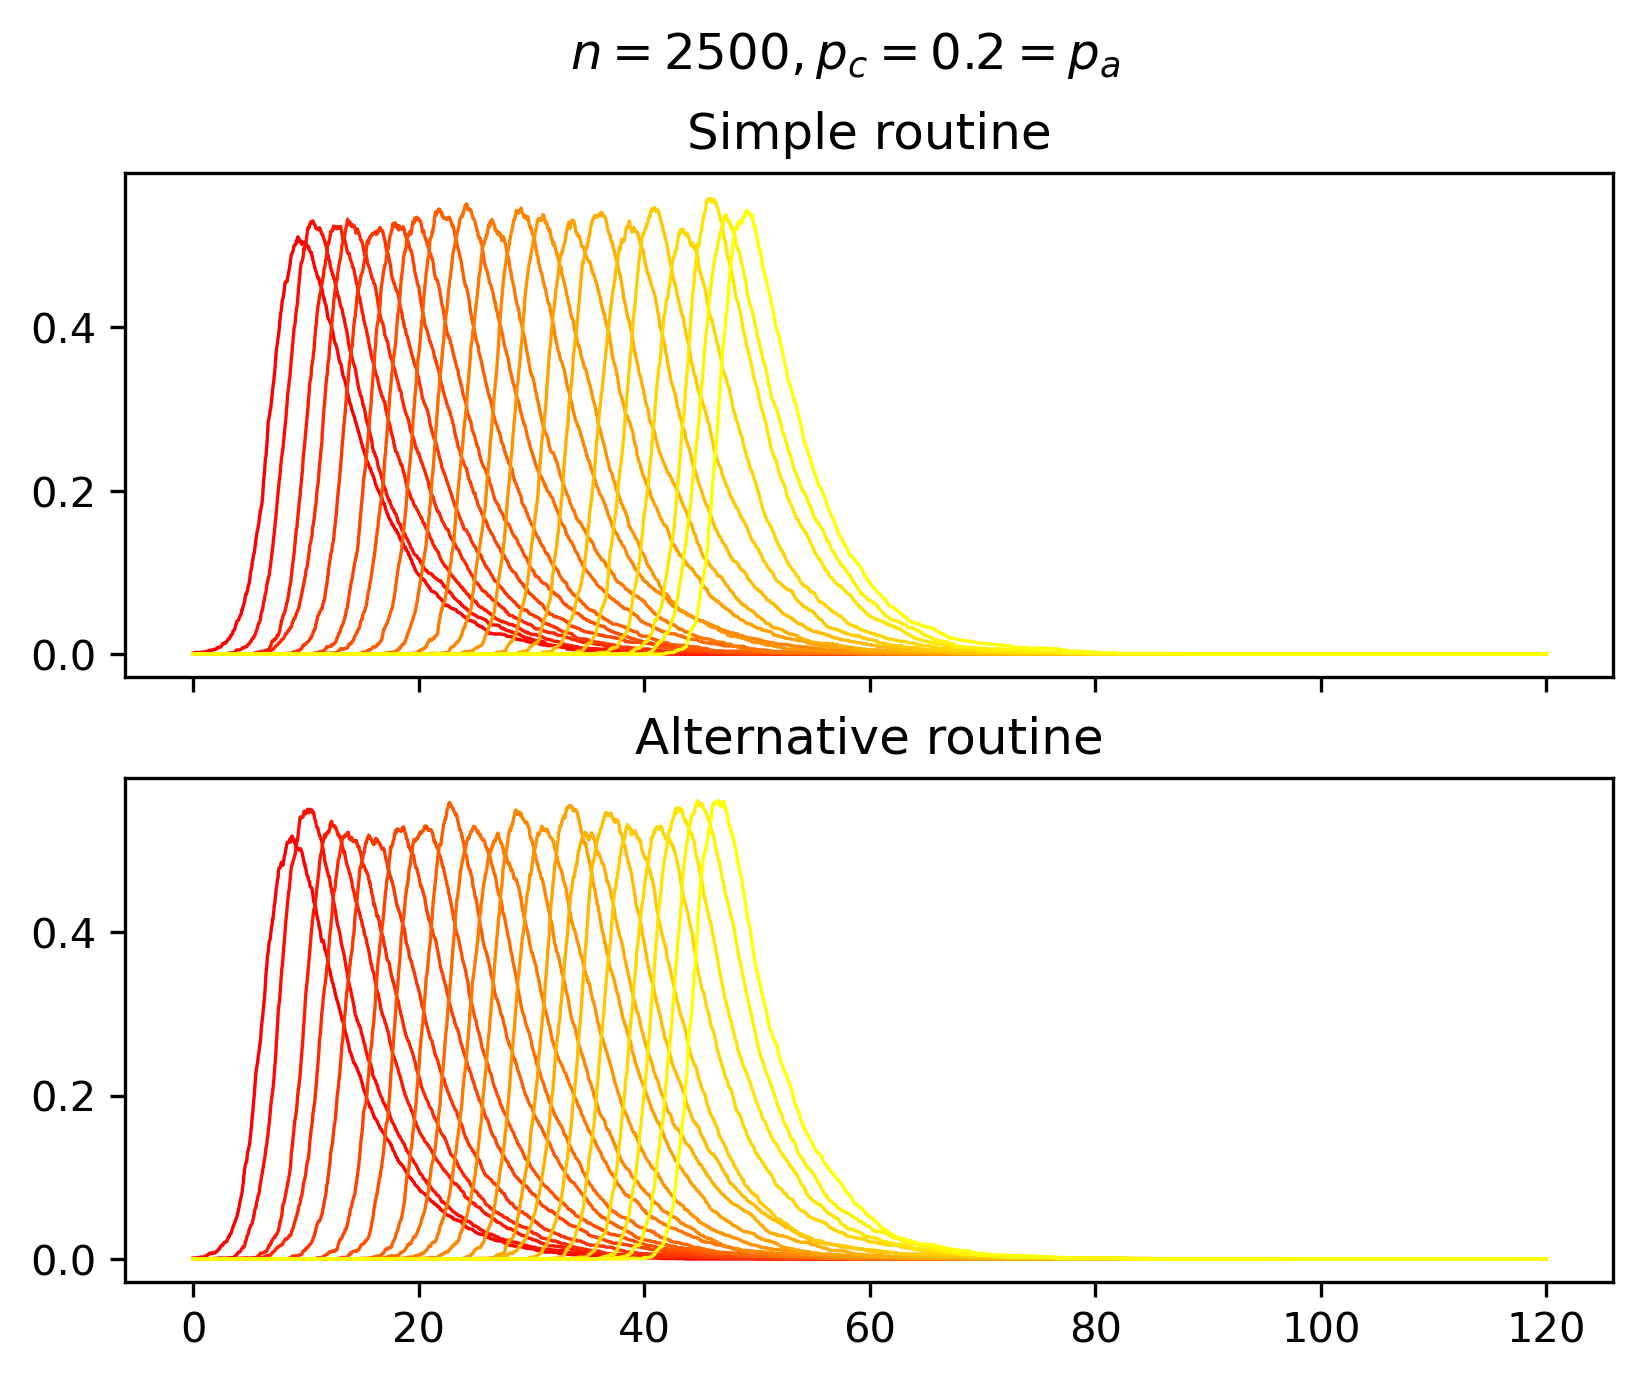

In [251]:
colors = cmap(np.linspace(0, 1, number_of_patches))
fig, ax = plt.subplots(2, 1, sharex=True, sharey=True)
for i in range(number_of_patches):
    param = dict(color=colors[i], linewidth=0.8)
    ax[0].plot(simple_res[-1], simple_res[1][:, i, :].sum(axis=-1) / patch_pop, **param)
    ax[1].plot(alt_res[-1], alt_res[1][:, i, :].sum(axis=-1) / patch_pop, **param)
ax[0].set_title('Simple routine')
ax[1].set_title('Alternative routine')
fig.suptitle(f'$n = {params['n']}, p_c=0.2 = p_a$')
plt.show()

# Visualise wave-speed difference

In [213]:
n_points = 5
n_samples = 10

adventurer_props = np.linspace(0, 0.2, n_points)
simple_series = np.zeros(shape=(n_points, n_samples, number_of_patches))
alt_series = np.zeros(shape=(n_points, n_samples, number_of_patches))
simple_epidemic = Epidemic_1D(routine_type='simple', **params)
alt_epidemic = Epidemic_1D(routine_type='alternative', **params)

for point, p_a in enumerate(adventurer_props):
    # update routine parameters
    simple_epidemic.set_routine_params(dict(p_a=p_a))
    alt_epidemic.set_routine_params(dict(p_a=p_a))
    for sample in range(n_samples):
        simple_res = simple_epidemic.simulate()
        alt_res = alt_epidemic.simulate()
        simple_series[point, sample, :] = (simple_res[1].sum(axis=-1)).argmax(axis=0) * t_delta
        alt_series[point, sample, :] = (alt_res[1].sum(axis=-1)).argmax(axis=0) * t_delta

In [215]:
simple_series.shape

(5, 10, 20)

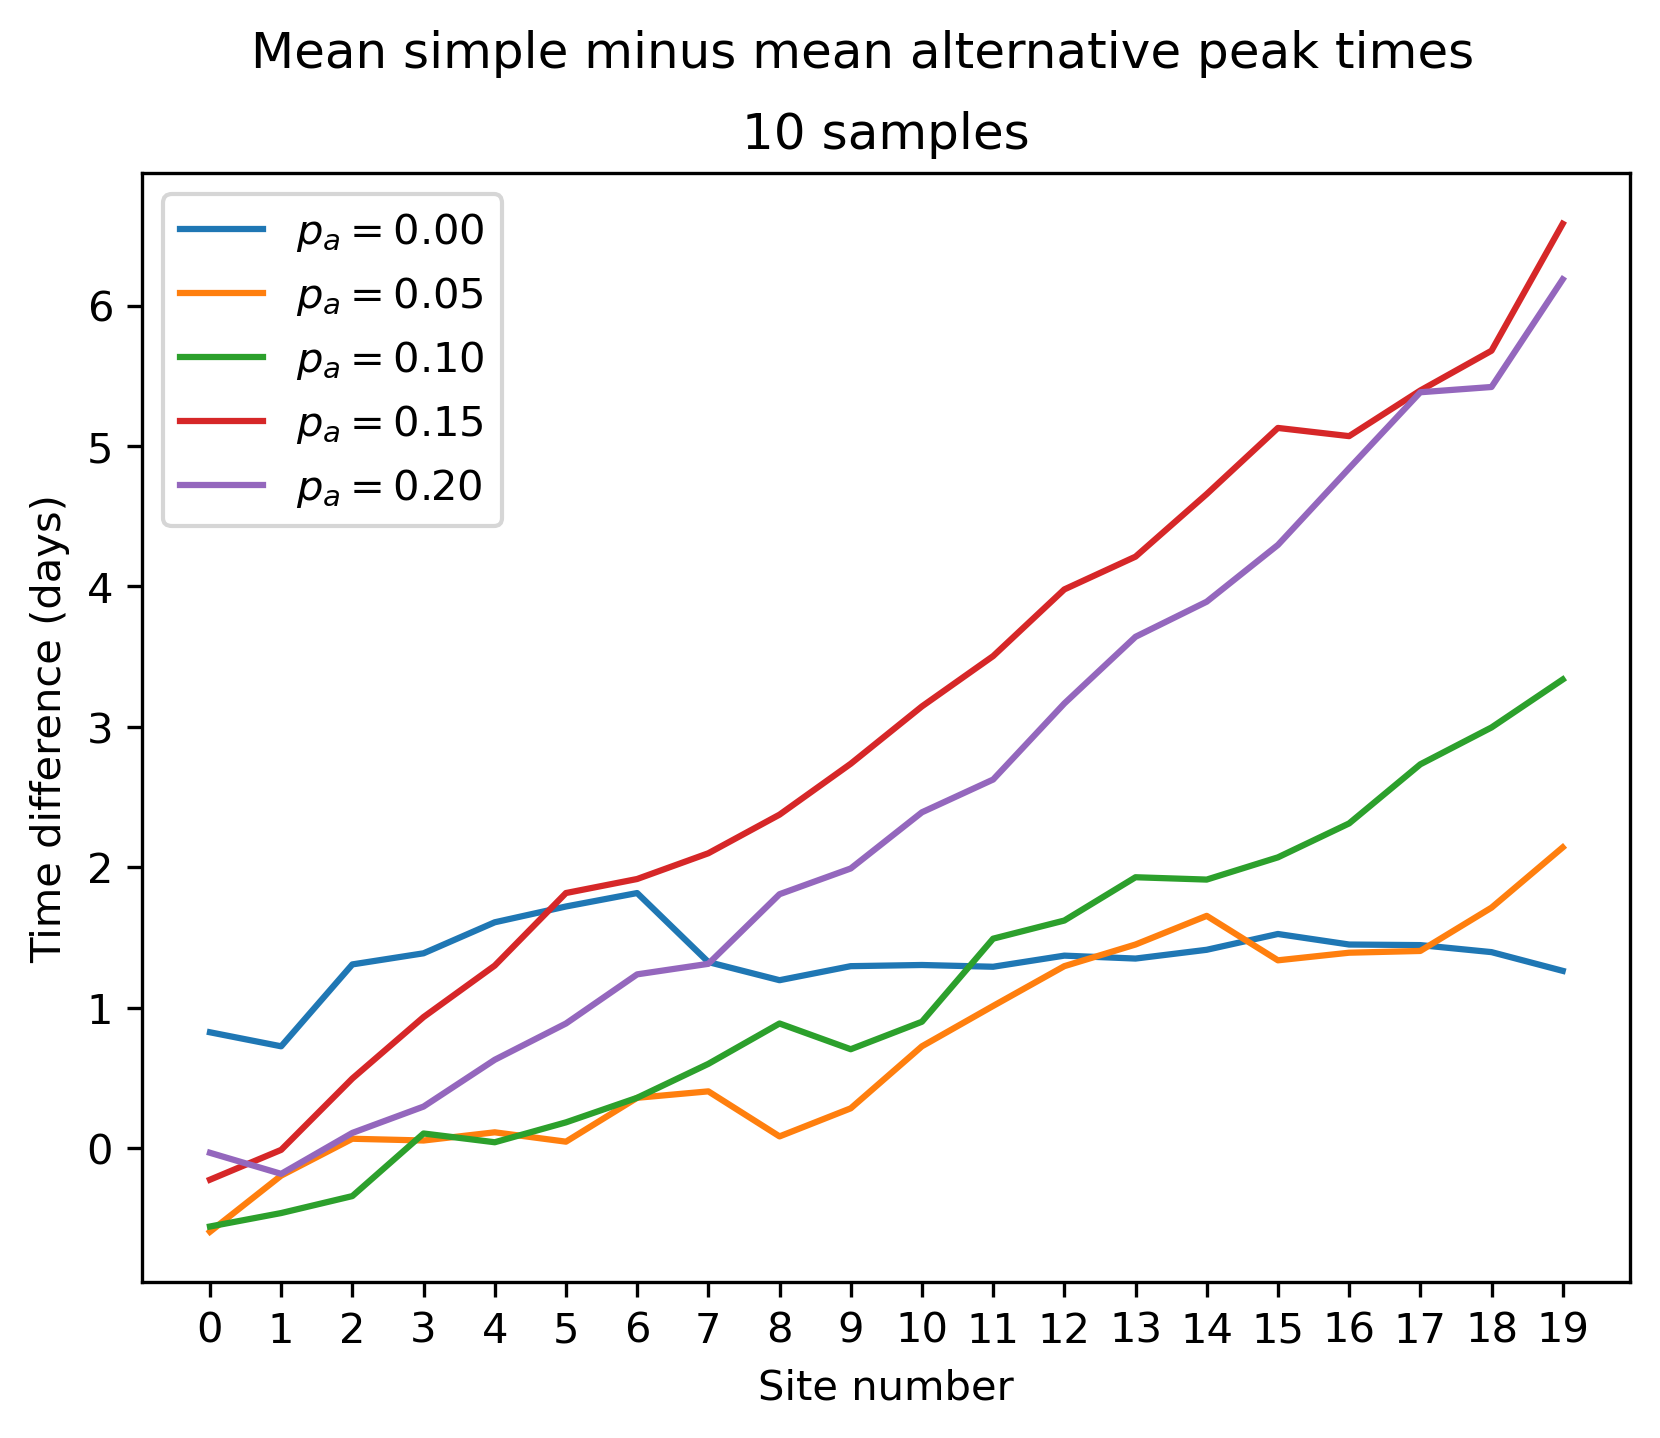

In [228]:
wave_colors = cmap(adventurer_props)
time_between = []
for i in range(len(adventurer_props)):
    simple = np.mean(simple_series[i, ...], axis=0)
    alt = np.mean(alt_series[i, ...], axis=0)
    plt.plot(simple - alt, label=f'$p_a ={adventurer_props[i]:.2f}$')
plt.xticks(np.arange(0, number_of_patches, 1))
plt.legend()
plt.suptitle('Mean simple minus mean alternative peak times')
plt.title(f'{n_samples} samples')
plt.xlabel('Site number')
plt.ylabel('Time difference (days)')
plt.show()